# Project 9 - Restaurant Revenue Prediction

Contents-

1- Problem Statment

2- Dataset Attributes

3- Importing Important Libraries and Dataset

4- EDA- Exploratry Data Analsys
    
5- Visualization
    
6- Data PreProcessing
    
    6.1 Label Encoding

7- Feature Selection

    7.1 Correlation
    7.2 VIF - Variance Inflation Factor (In this we dont use as we have limited features)

8- Data Spliting 

9- Modeling

    9.1 Decison Tree Model
    9.2 Linear Regression Model
    9.3 Random Froest Model
    9.3 Gradient Boosting Model

10- Conclusions

# 1. Problem Statment

Create a machine learning model to predict revenue of the restaurant based on
the features present in the dataset.


# 2. Dataset Attributes

1. ID - Restaurant ID
2. Name - Name of the Restaurant
3. Franchise - Restaurant has franchise or not
4. Category - specific type of category provided by restaurant
5. No_of_item - Different types of items provided by restaurant
6. Order_Placed - Order placed by customer to restaurant (in lacs)
7. Revenue - Total amount of income generated by the restaurant

# 3. Importing  Libraries and Dataset

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Libaraies for modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error,accuracy_score,r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# load the dataset
data=pd.read_csv('revenue_prediction.csv')

In [3]:
# check the basic informations.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


dataset contains 100 obersvations of restraurant with 8 attributes

# 4. EDA- Exploratory Data Analysis

In [4]:
# check the null/nan values present in our dataset
data.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [5]:
# check the duplicates values 
data.duplicated().sum()

0

In [6]:
# check the data type of our features
data.dtypes

Id                int64
Name             object
Franchise        object
Category         object
City             object
No_Of_Item        int64
Order_Placed    float64
Revenue           int64
dtype: object

In [7]:
# first 5 rows of our dataset.
data.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [8]:
# Drop ID as this feature is not important
data=data.drop(columns=['Id'])
data

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...
95,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [9]:
# check 5number summary of our numerical features
data.describe()

,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,1.000000e+02
mean,49.080000,4.086000,4.395161e+06
std,22.370923,2.055101,2.659932e+06
min,18.000000,1.000000,8.498700e+05
25%,34.750000,2.750000,2.688328e+06
50%,45.000000,3.650000,3.911401e+06
75%,57.250000,5.100000,5.330084e+06
max,126.000000,13.000000,1.969694e+07


In [10]:
# check 5number summary of our catergorical features
data.describe(include='object')

,Name,Franchise,Category,City
count,100,100,100,100
unique,100,2,20,5
top,HungryHowie'sPizza,Yes,Varied Menu,Bengaluru
freq,1,55,16,43


# 5 Visualizations

Text(0.5, 1.0, 'Frequency of Restraurant in City')

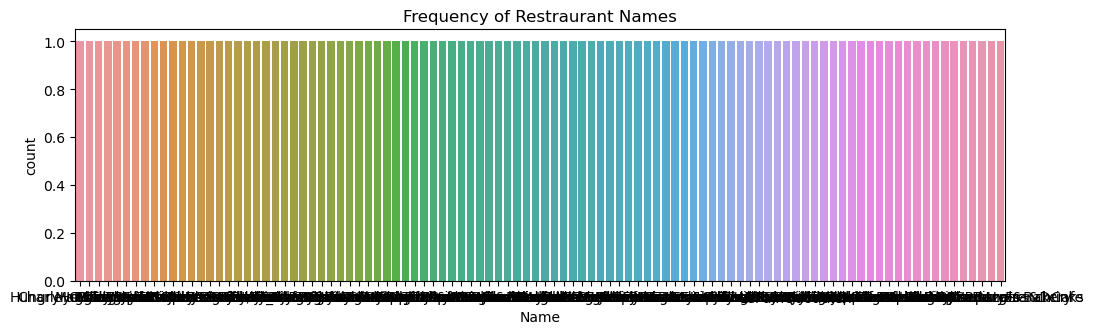

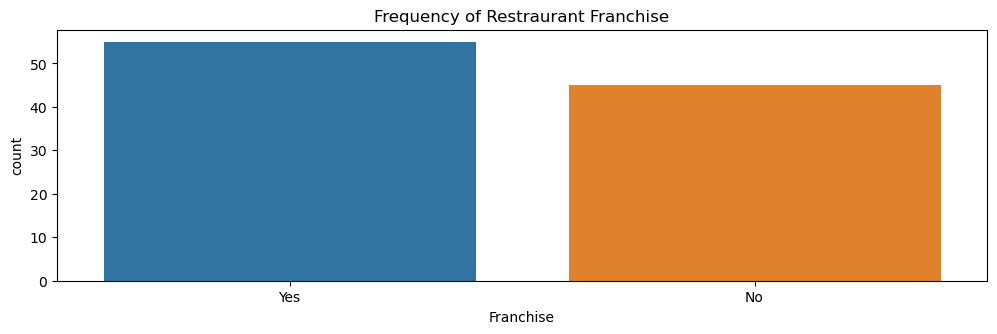

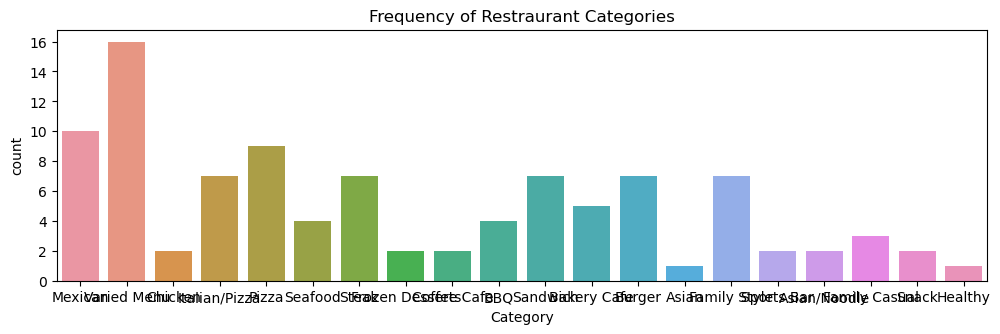

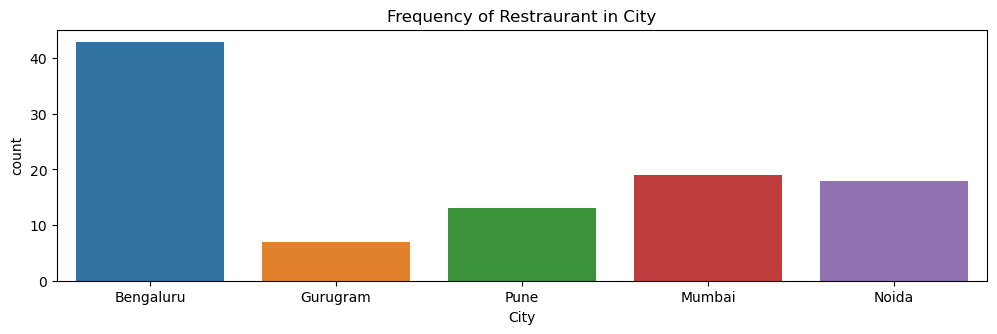

In [11]:
#ploting the categorical features

plt.figure(figsize=(12,15))
plt.subplot(4,1,1)
sns.countplot(x='Name',data=data)
plt.title("Frequency of Restraurant Names")


plt.figure(figsize=(12,15))
plt.subplot(4,1,2)
sns.countplot(x='Franchise',data=data)
plt.title("Frequency of Restraurant Franchise")


plt.figure(figsize=(12,15))
plt.subplot(4,1,3)
sns.countplot(x='Category',data=data)
plt.title("Frequency of Restraurant Categories")


plt.figure(figsize=(12,15))
plt.subplot(4,1,4)
sns.countplot(x='City',data=data)
plt.title("Frequency of Restraurant in City")


In [12]:
data.head(2)

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131


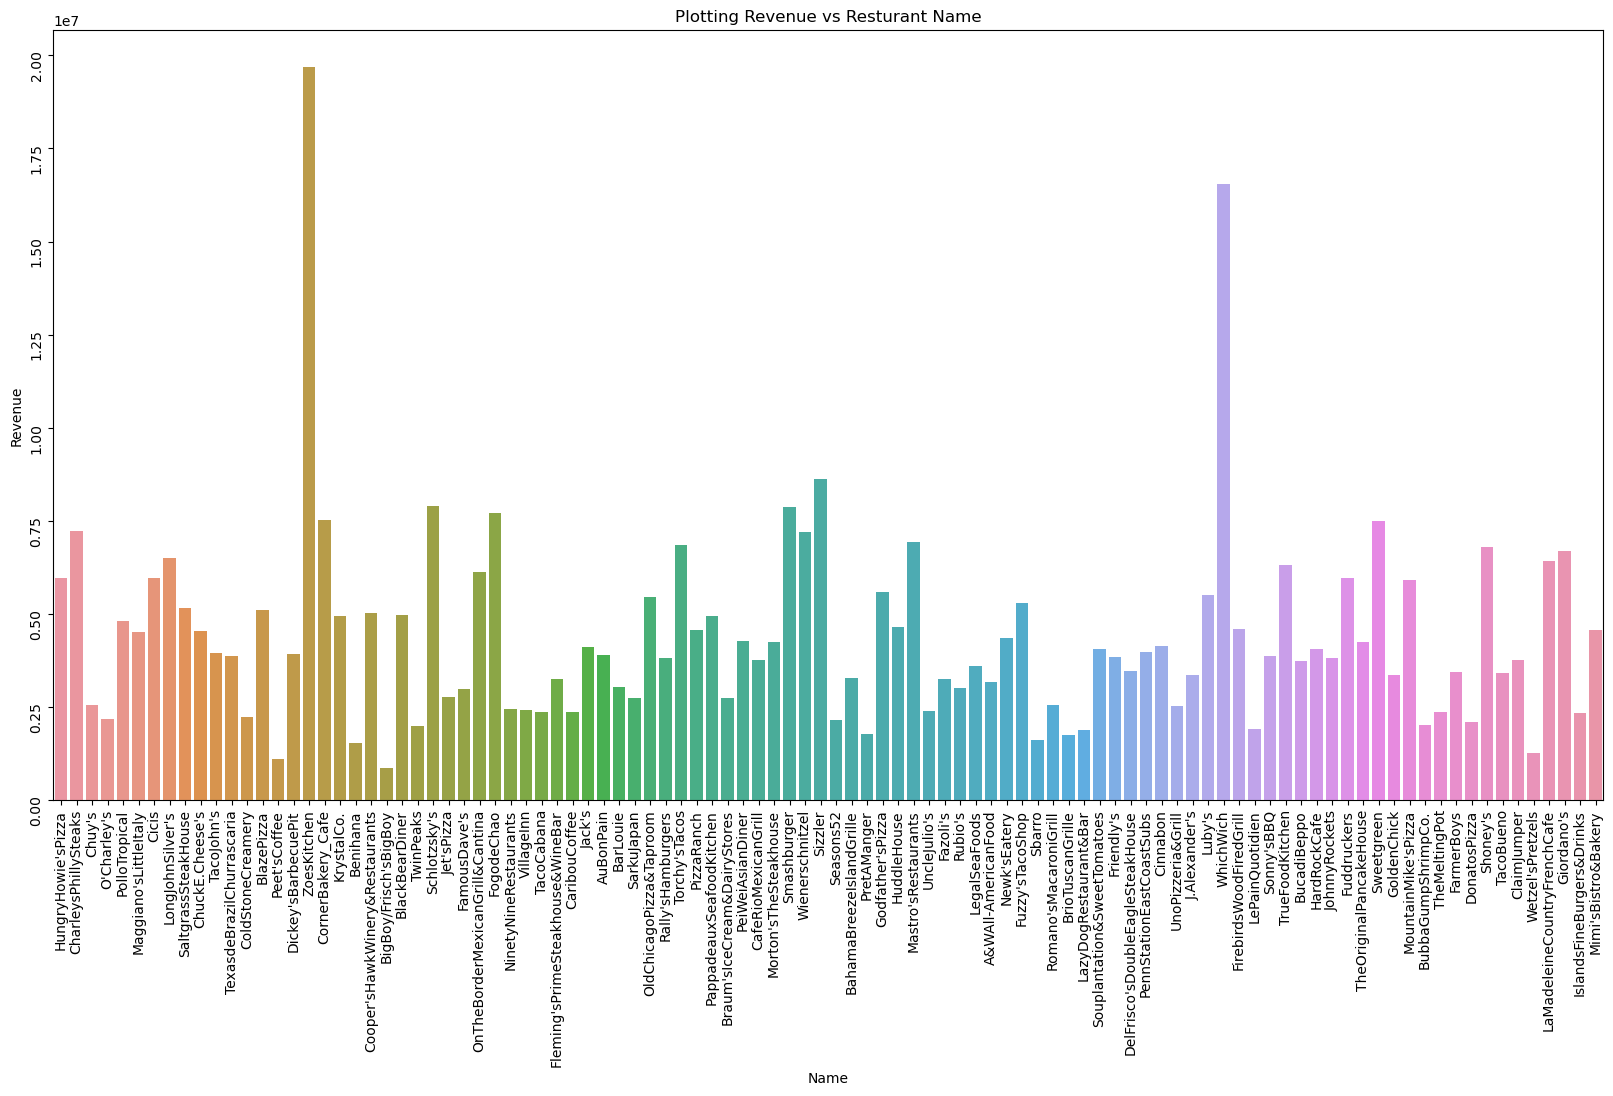

In [13]:
# Plotting the Numerical features.
# Plot Restaurant Name vs Revenue
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=10)
plt.xlabel("Name of Resturants")
plt.ylabel("Revenue of Resturants")
sns.barplot(x="Name",y="Revenue",data=data)
plt.title("Plotting Revenue vs Resturant Name")
plt.show()

Above graph is showing the Resturants name with revenue, as per above graph ZoesKitchen has the height revenue
and BigBoy/Frisch'sBigBoy has lowest revenue

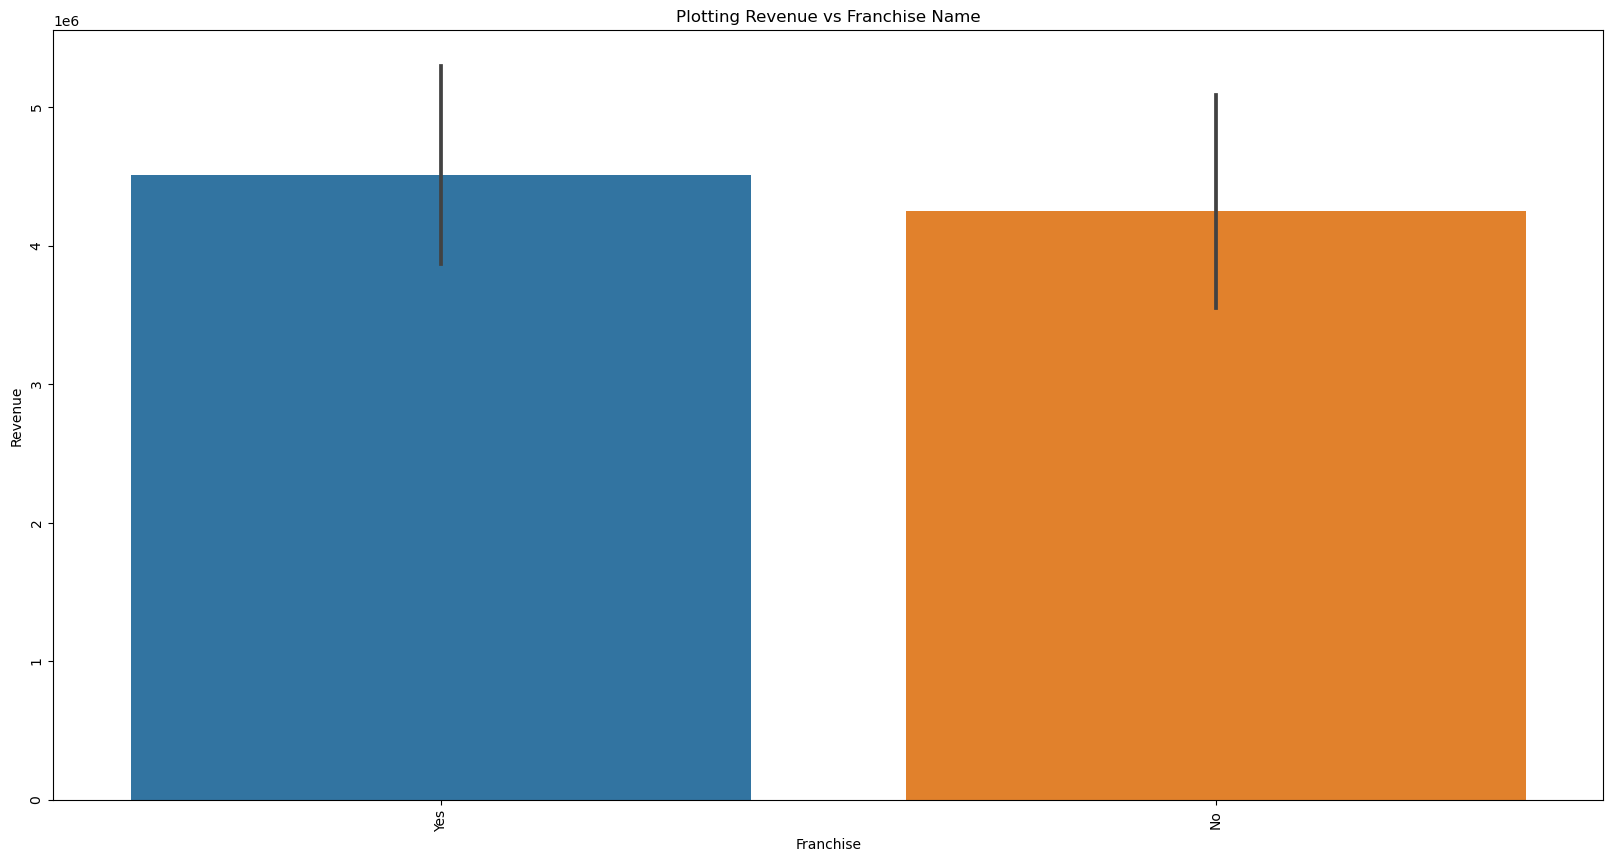

In [14]:
# Plot Franchis vs Revenue
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=10)
plt.xlabel("Revenue of Resturants")
plt.ylabel("Franchise of Resturants")
sns.barplot(x="Franchise",y="Revenue",data=data)
plt.title("Plotting Revenue vs Franchise Name")
plt.show()

As per above graph was can see that Revenue for those resturant has high who have Franchies

In [15]:
data.head(2)

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131


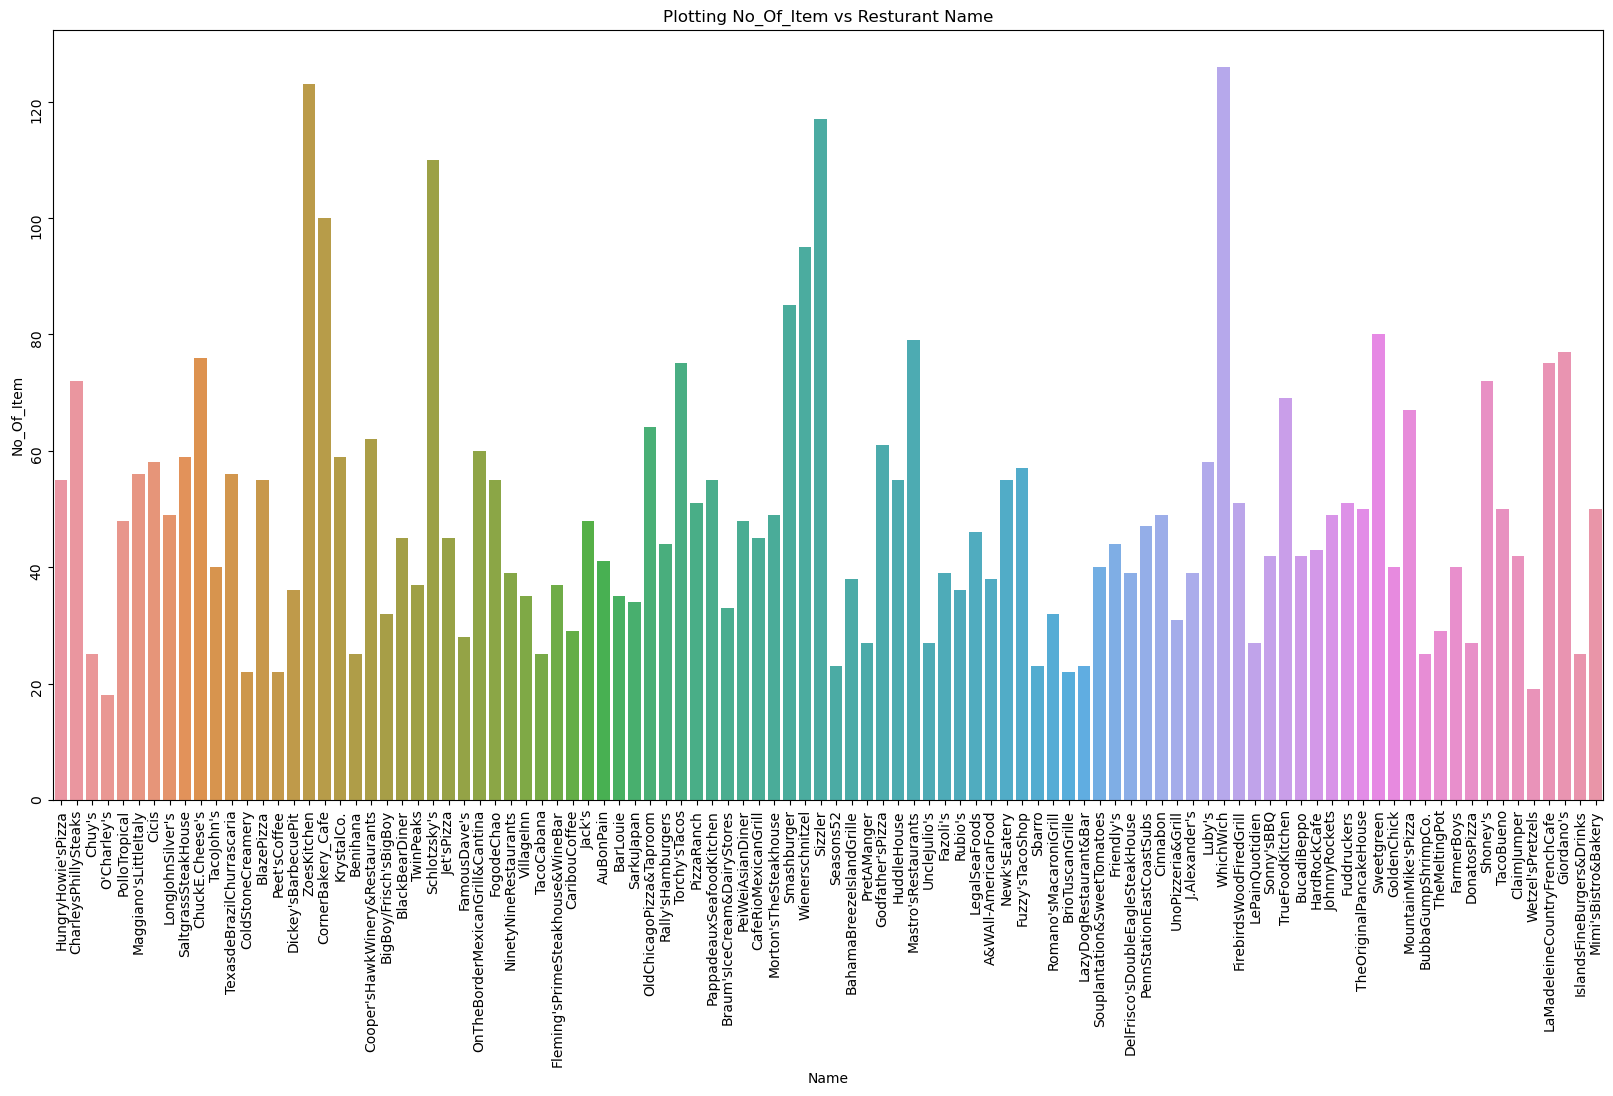

In [16]:
# Plot Restaurant Name vs No_Of_Item
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=10)
plt.xlabel("Name of Resturants")
plt.ylabel("No of Items in Resturants")
sns.barplot(y="No_Of_Item",x="Name",data=data)
plt.title("Plotting No_Of_Item vs Resturant Name")
plt.show()

Whichwich has more no of Items in this Resturants and Less items in O'Charley's

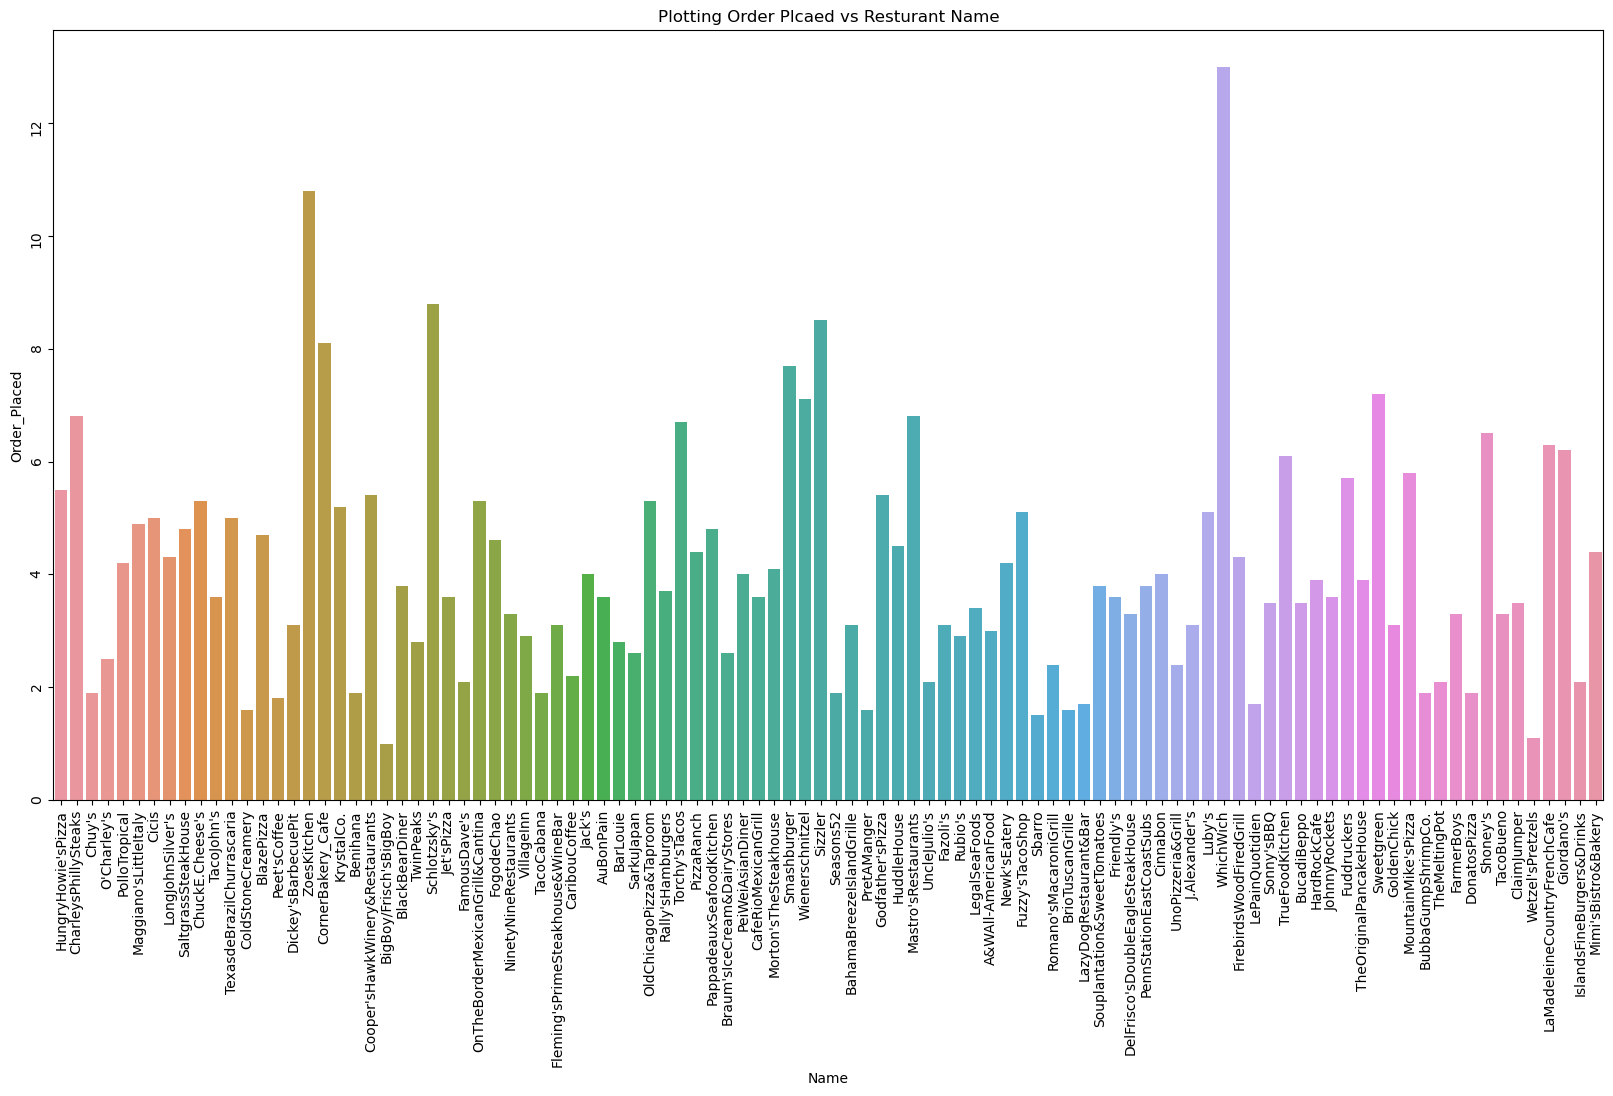

In [17]:
# Plot Restaurant Name vs Order Placed
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=10)
plt.xlabel("Name of Resturants")
plt.ylabel("Order Placed in Resturant")
sns.barplot(y="Order_Placed",x="Name",data=data)
plt.title("Plotting Order Plcaed vs Resturant Name")
plt.show()

Maximum order palced in WhichWich Resturants and Minimum order placed in BigBoy/Frisch'sBigBoy 

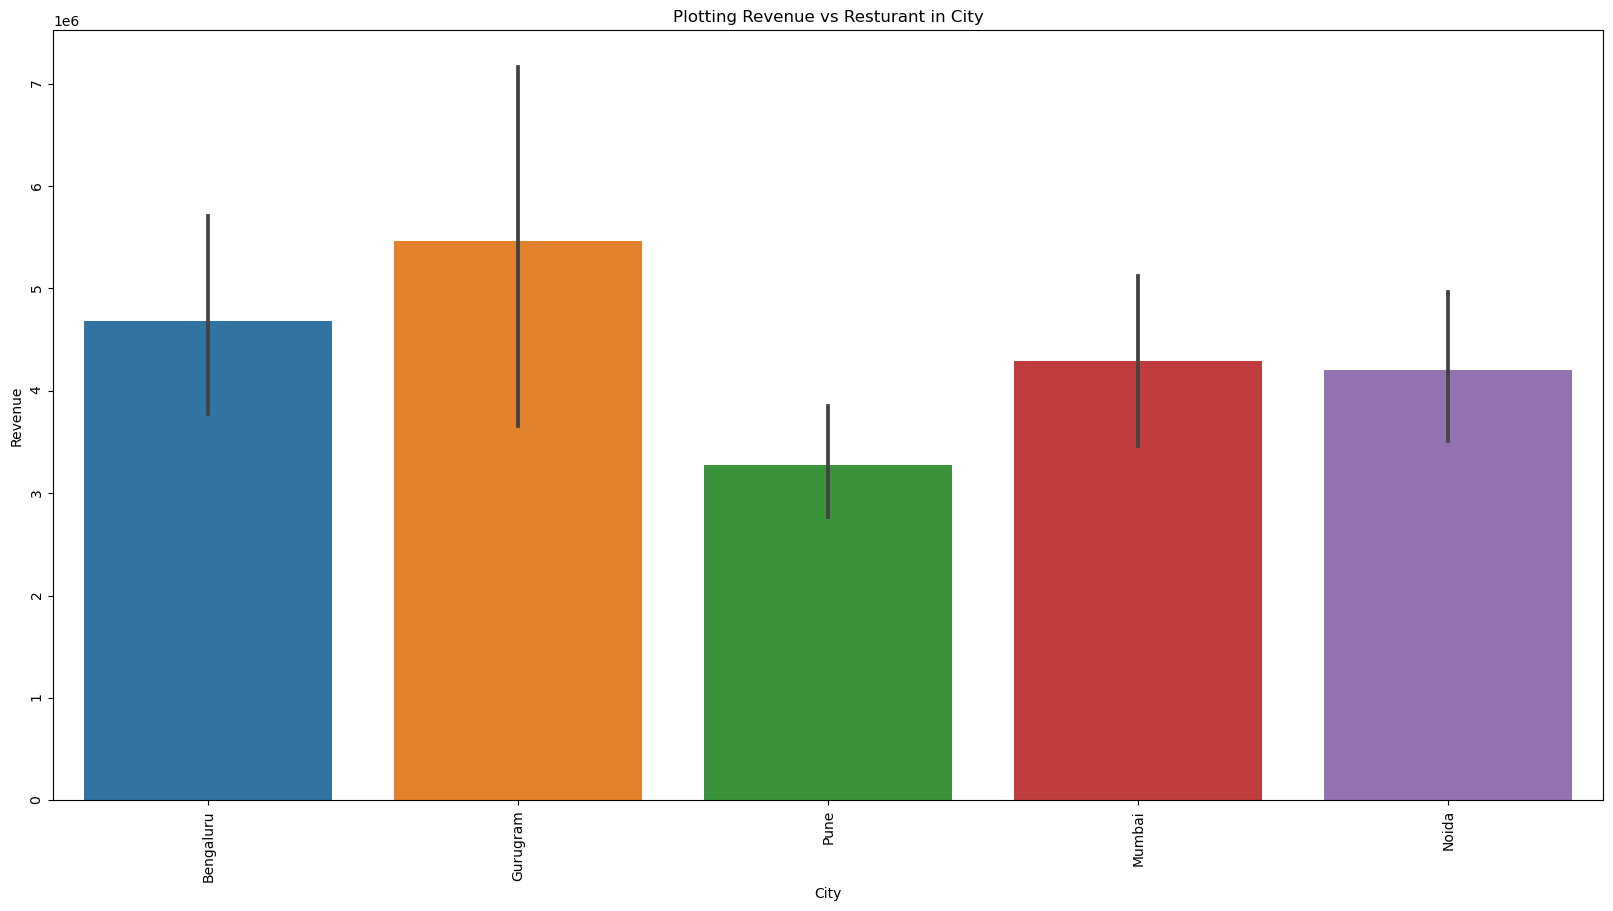

In [18]:
# Plot City vs Revenue
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=10)
plt.xlabel("Resturants in City")
plt.ylabel("Revenue of Resturants")
sns.barplot(x="City",y="Revenue",data=data)
plt.title("Plotting Revenue vs Resturant in City")
plt.show()

Resturants who are in Gurgaun has maximum revenue earning and Pune has minimum revenue earnings. 

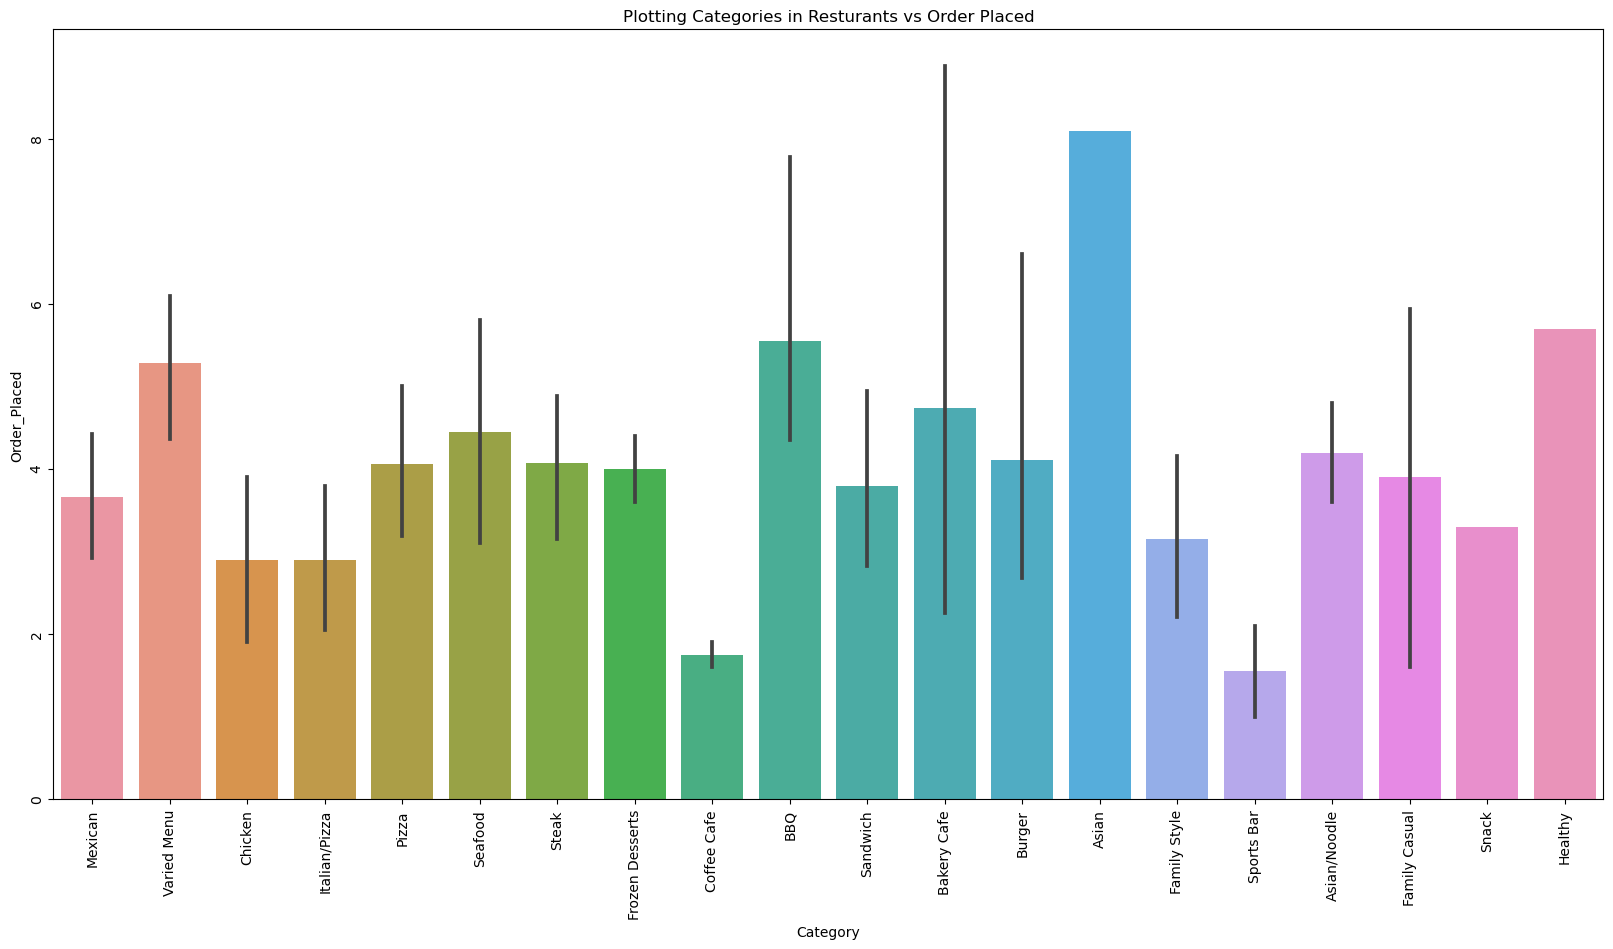

In [19]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=10)
plt.xlabel("Categories in Resturants")
plt.ylabel("Order Plcaed")
sns.barplot(x="Category",y="Order_Placed",data=data)
plt.title("Plotting Categories in Resturants vs Order Placed")
plt.show()

Asian dish's has maximum demand, therefor customer placed oreder for the same

# 6- Data Preprocessing - Label Encoding

In [20]:
le=LabelEncoder()
data['Name']=le.fit_transform(data['Name'])
data['Franchise']=le.fit_transform(data['Franchise'])
data['Category']=le.fit_transform(data['Category'])
data['City']=le.fit_transform(data['City'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          100 non-null    int32  
 1   Franchise     100 non-null    int32  
 2   Category      100 non-null    int32  
 3   City          100 non-null    int32  
 4   No_Of_Item    100 non-null    int64  
 5   Order_Placed  100 non-null    float64
 6   Revenue       100 non-null    int64  
dtypes: float64(1), int32(4), int64(2)
memory usage: 4.0 KB


In [21]:
data.head(2)

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,40,1,12,0,55,5.5,5953753
1,14,0,19,1,72,6.8,7223131


# 7- Feature Selections
We can use below methods for using Featue selections:

    1- Correlation - its a releation between dependent feature and independent Features.

    2- VIF(Variance Inflation Factor) its used for check multicolinearity betweem other featrues

# 7.1 Check the correlation.

<AxesSubplot:>

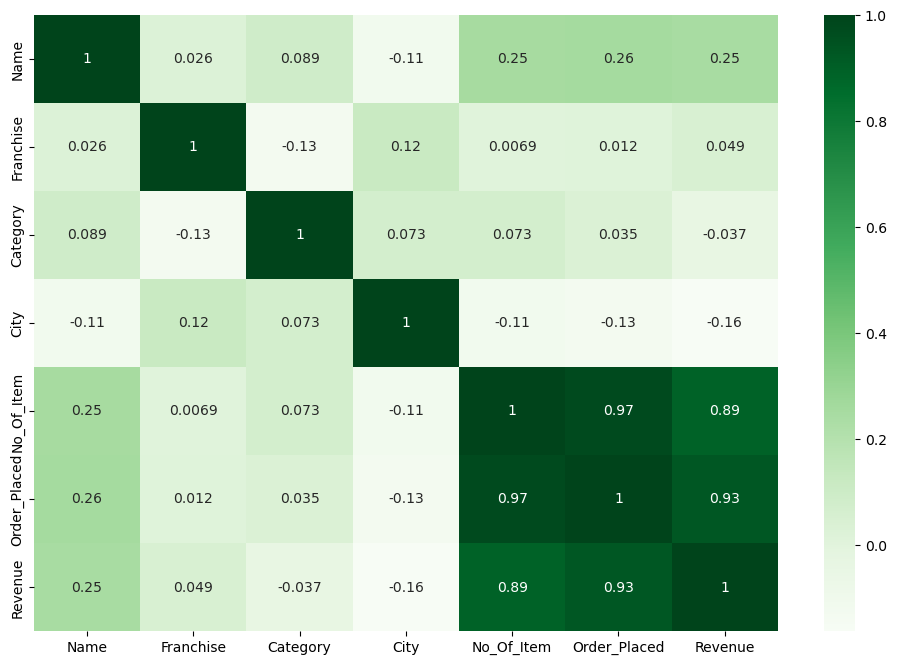

In [22]:
# check the correlations.
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap="Greens")

above correlation graph is showing that No_of_Items is ighly correlated with Order_Placed and has has very low correlation with 
NO_of_items with City.

<AxesSubplot:>

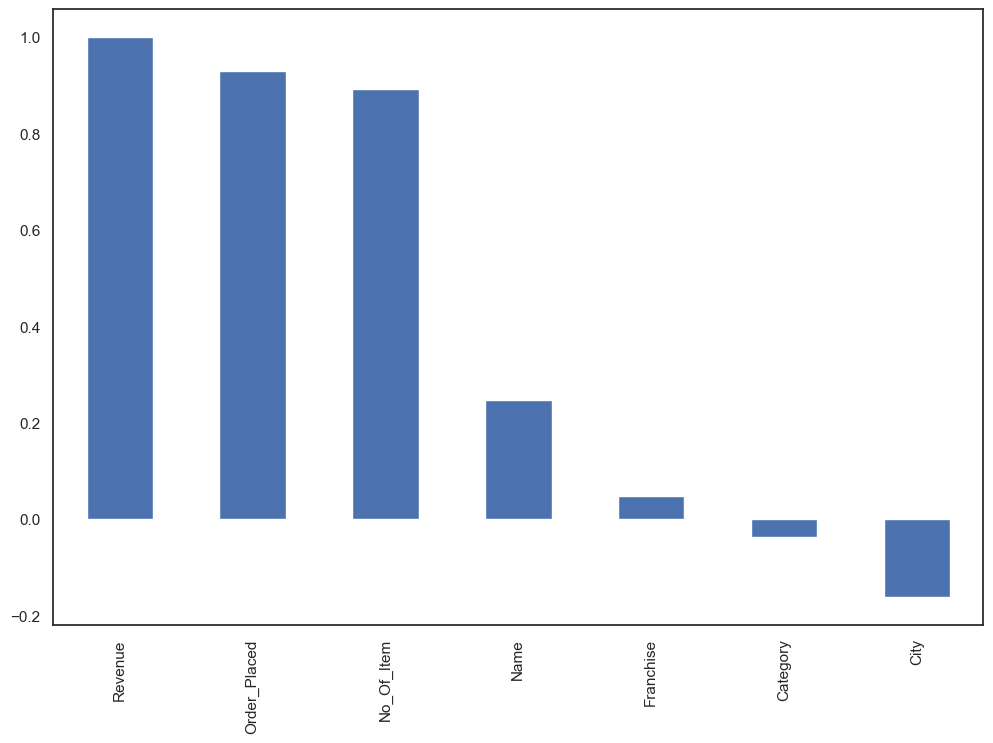

In [23]:
# Another way to show the correlations
plt.figure(figsize=(12,8))
sns.set(style="white")
data.corr()['Revenue'].sort_values(ascending=False).plot(kind='bar')


In [24]:
data

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,40,1,12,0,55,5.5,5953753
1,14,0,19,1,72,6.8,7223131
2,16,1,5,4,25,1.9,2555379
3,60,1,11,2,18,2.5,2175511
4,68,1,13,3,48,4.2,4816715
...,...,...,...,...,...,...,...
95,96,0,11,0,19,1.1,1270499
96,47,1,19,0,75,6.3,6412623
97,35,1,19,1,77,6.2,6694797
98,41,1,17,4,25,2.1,2344689


# 8 Data Splitng

In [25]:
#8.1 Data split into Independent and Dependent variables
x=data.iloc[:,:-1]   
y=data.iloc[:,-1]

In [26]:
# Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 6)
(30, 6)
(70,)
(30,)


# 9 Modeling

# 9.1 Linear Regression

* Linear Regression*

Train Accuracy Score: 0.9664548871795416
Test Accuracy Score: 0.7225917412747328
MSE: 3093038204597.8926
MAE: 894562.8862521601
RMSE: 1758703.557907896
------------------------------------------------------------


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an err

Text(0.5, 1.0, 'Regression Plot')

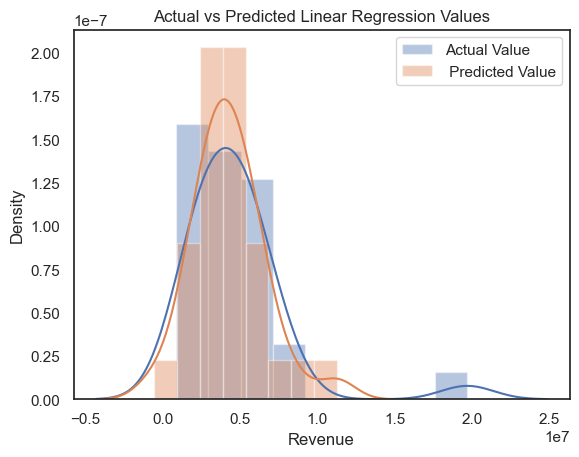

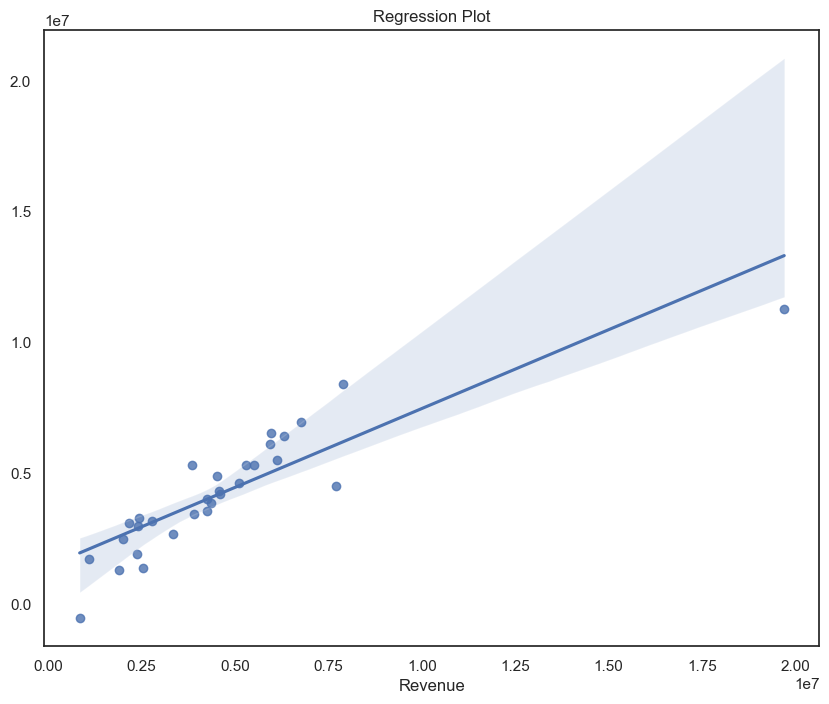

In [27]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

print('* Linear Regression*\n')

print('Train Accuracy Score:', lr.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,lr_pred))

print('MSE:',metrics.mean_squared_error(y_test,lr_pred))
print('MAE:',metrics.mean_absolute_error(y_test,lr_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))


sns.distplot(y_test,label='Actual Value')
sns.distplot(lr_pred,label=' Predicted Value')
plt.title("Actual vs Predicted Linear Regression Values")
plt.legend()


print("-"*60)

plt.figure(figsize=(10,8))
sns.regplot(y_test,y=lr_pred)
plt.title("Regression Plot")

# 9.2 Decision Tree Regression

* Decision Tree Regression*

Train Accuracy Score: 1.0
Test Accuracy Score: 0.5610681005002409
MSE: 4893989604375.9
MAE: 981621.5666666667
RMSE: 2212236.335560896
------------------------------------------------------------


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an err

Text(0.5, 1.0, 'Regression Plot')

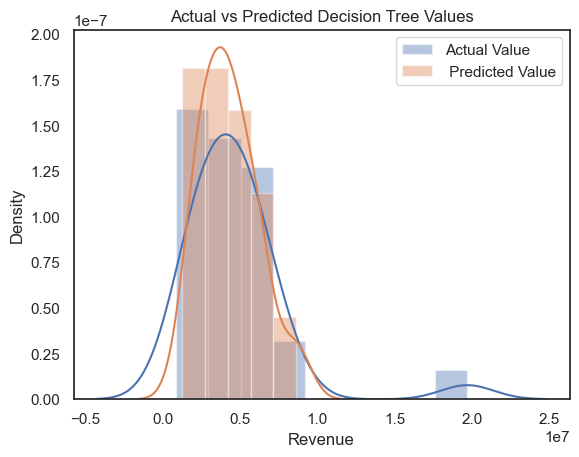

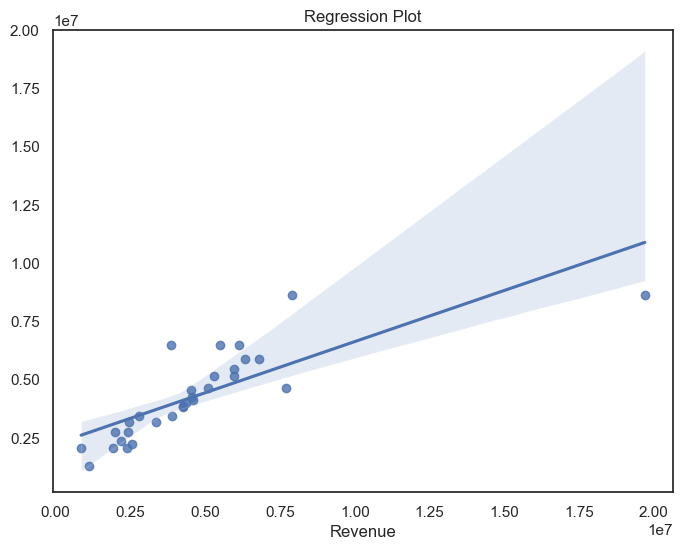

In [28]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

print('* Decision Tree Regression*\n')

print('Train Accuracy Score:', dt.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,dt_pred))

print('MSE:',metrics.mean_squared_error(y_test,dt_pred))
print('MAE:',metrics.mean_absolute_error(y_test,dt_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))

sns.distplot(y_test,label='Actual Value')
sns.distplot(dt_pred,label=' Predicted Value')
plt.title("Actual vs Predicted Decision Tree Values")
plt.legend()


print("-"*60)

plt.figure(figsize=(8,6))
sns.regplot(y_test,y=dt_pred)
plt.title("Regression Plot")

# 9.3 Random Forest Regression

* Random Forest Regression*

Train Accuracy Score: 0.974235730328792
Test Accuracy Score: 0.7261481917186875
MSE: 3053384601109.45
MAE: 791900.3969999999
RMSE: 1747393.6594566922
------------------------------------------------------------


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an err

Text(0.5, 1.0, 'Regression Plot')

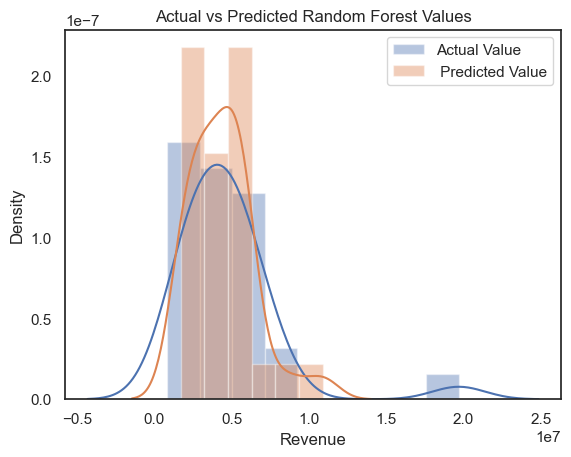

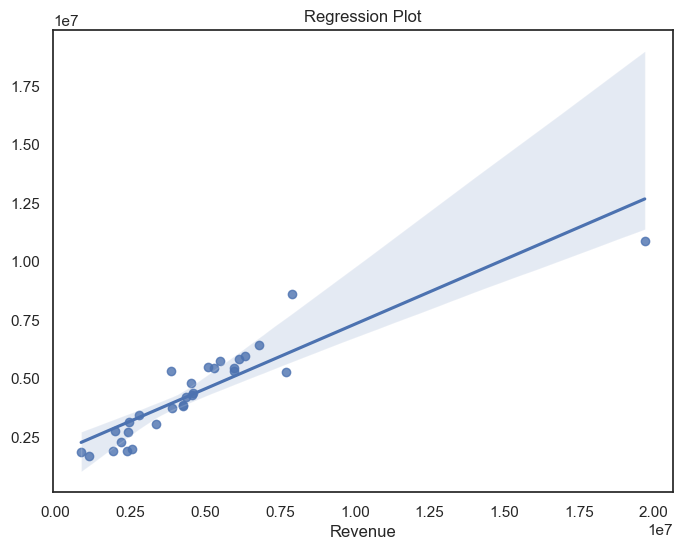

In [29]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

print('* Random Forest Regression*\n')

print('Train Accuracy Score:', rf.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,rf_pred))

print('MSE:',metrics.mean_squared_error(y_test,rf_pred))
print('MAE:',metrics.mean_absolute_error(y_test,rf_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

sns.distplot(y_test,label='Actual Value')
sns.distplot(rf_pred,label=' Predicted Value')
plt.title("Actual vs Predicted Random Forest Values")
plt.legend()

print("-"*60)

plt.figure(figsize=(8,6))
sns.regplot(y_test,y=rf_pred)
plt.title("Regression Plot")

# 9.4 Gradient Boosting Regressor

* Gradient Boosting Regression *

Train Accuracy Score: 0.9992074691065072
Test Accuracy Score: 0.6106620433676586
MSE: 4341028561649.7534
MAE: 861606.2282112119
RMSE: 2083513.5136710184
------------------------------------------------------------


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an err

Text(0.5, 1.0, 'Regression Plot')

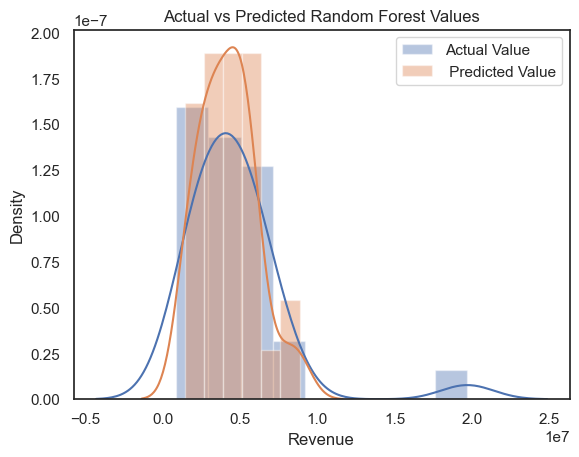

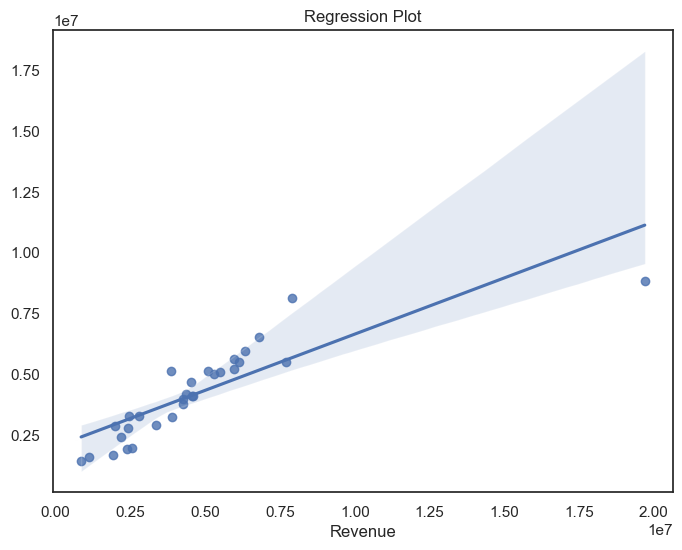

In [30]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)

print('* Gradient Boosting Regression *\n')

print('Train Accuracy Score:', gb.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,gb_pred))

print('MSE:',metrics.mean_squared_error(y_test,gb_pred))
print('MAE:',metrics.mean_absolute_error(y_test,gb_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,gb_pred)))

sns.distplot(y_test,label='Actual Value')
sns.distplot(gb_pred,label=' Predicted Value')
plt.title("Actual vs Predicted Random Forest Values")
plt.legend()

print("-"*60)

plt.figure(figsize=(8,6))
sns.regplot(y_test,y=gb_pred)
plt.title("Regression Plot")

In [31]:
# Combines Score display...

print('LR_MSE:',metrics.mean_squared_error(y_test,lr_pred))
print('LR_MAE:',metrics.mean_absolute_error(y_test,lr_pred))
print('LR_RMSE:',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))
print('Test Accuracy Score:', r2_score(y_test,lr_pred))


print('************\n')

print('DT_MSE:',metrics.mean_squared_error(y_test,dt_pred))
print('DT_MAE:',metrics.mean_absolute_error(y_test,dt_pred))
print('DT_RMSE:',np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))
print('Test Accuracy Score:', r2_score(y_test,dt_pred))

print('************\n')

print('RF_MSE:',metrics.mean_squared_error(y_test,rf_pred))
print('RF_MAE:',metrics.mean_absolute_error(y_test,rf_pred))
print('RF_RMSE:',np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))
print('Test Accuracy Score:', r2_score(y_test,rf_pred))

print('************\n')

print('GB_MSE:',metrics.mean_squared_error(y_test,gb_pred))
print('GB_MAE:',metrics.mean_absolute_error(y_test,gb_pred))
print('GB_RMSE:',np.sqrt(metrics.mean_squared_error(y_test,gb_pred)))
print('Test Accuracy Score:', r2_score(y_test,gb_pred))


LR_MSE: 3093038204597.8926
LR_MAE: 894562.8862521601
LR_RMSE: 1758703.557907896
Test Accuracy Score: 0.7225917412747328
************

DT_MSE: 4893989604375.9
DT_MAE: 981621.5666666667
DT_RMSE: 2212236.335560896
Test Accuracy Score: 0.5610681005002409
************

RF_MSE: 3053384601109.45
RF_MAE: 791900.3969999999
RF_RMSE: 1747393.6594566922
Test Accuracy Score: 0.7261481917186875
************

GB_MSE: 4341028561649.7534
GB_MAE: 861606.2282112119
GB_RMSE: 2083513.5136710184
Test Accuracy Score: 0.6106620433676586


# 10 Conclussions:


As per above models we get the highest accuracy in Random Forest Model with 72.61% as compair to other this is best model.
We have also get the similar accuracy in Linear Regression model with 72.26%. I will suggest to use both model for further analysis on Resturanat Revenue Prediction.